In [0]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Dropout,Dense,GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
training_data_generator = ImageDataGenerator()

In [0]:
from google.colab import drive, files

In [0]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download=drive.CreateFile({'id':'1uZPAeoE_iu-FsVDuJwfJfclefW_z9z-M'})

In [0]:
download.GetContentFile('subbu.zip')
!unzip subbu.zip

Archive:  subbu.zip
   creating: shrimp/
   creating: shrimp/dead/
  inflating: shrimp/dead/IMG20190222174816.jpg  
  inflating: shrimp/dead/IMG20190222174818.jpg  
  inflating: shrimp/dead/IMG20190222174825.jpg  
  inflating: shrimp/dead/IMG20190222174826.jpg  
  inflating: shrimp/dead/IMG20190222174829.jpg  
  inflating: shrimp/dead/IMG20190222174832.jpg  
  inflating: shrimp/dead/IMG20190222174840.jpg  
  inflating: shrimp/dead/IMG20190222174842.jpg  
  inflating: shrimp/dead/IMG20190222174857.jpg  
  inflating: shrimp/dead/IMG20190222174901.jpg  
  inflating: shrimp/dead/IMG20190222174934.jpg  
  inflating: shrimp/dead/IMG20190222174937.jpg  
  inflating: shrimp/dead/IMG20190222174939.jpg  
  inflating: shrimp/dead/IMG20190222174953.jpg  
  inflating: shrimp/dead/IMG20190222174955.jpg  
  inflating: shrimp/dead/IMG20190222174958.jpg  
  inflating: shrimp/dead/IMG20190222175001.jpg  
  inflating: shrimp/dead/IMG20190222175004.jpg  
  inflating: shrimp/dead/IMG20190222175006.jpg  
  

In [0]:
training_generator = training_data_generator.flow_from_directory(
    'shrimp/',
    target_size=(224, 224),
    batch_size=10,
    class_mode="binary")

Found 508 images belonging to 2 classes.


In [0]:
from keras.applications.mobilenet import MobileNet
model = MobileNet(depth_multiplier=1,classes=2,alpha=1.0,weights= 'imagenet', include_top=False, input_shape= (224,224,3))
x = model.output
x = GlobalAveragePooling2D()(x)
x =Dropout(0.7)(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = model.input, outputs = predictions)
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // 10,
    epochs=10)







17227776/17225924 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
50/50 [==============================] - 181s 4s/step - loss: 0.8397 - acc: 0.6465
Epoch 2/10
50/50 [==============================] - 179s 4s/step - loss: 0.3635 - acc: 0.8460
Epoch 3/10
50/50 [==============================] - 179s 4s/step - loss: 0.2653 - acc: 0.8925
Epoch 4/10
50/50 [==============================] - 181s 4s/step - loss: 0.1961 - acc: 0.9200
Epoch 5/10
50/50 [==============================] - 179s 4s/step - loss: 0.1122 - acc: 0.9615
Epoch 6/10
50/50 [==============================] - 179s 4s/step - loss: 0.1020 - acc: 0.9580
Epoch 7/10
50/50 [==============================] - 179s 4s/step - loss: 0.0636 - acc: 0.9710
Epoch 8/10
50/50 [==============================] - 178s 4s/s

In [0]:
import keras
keras_model = "prawn_keras_model.h5"
keras.models.save_model(model, keras_model)

Using TensorFlow backend.


NameError: ignored

In [0]:
from keras.models import load_model
load_model('prawn_keras_model.h5')

OSError: ignored

In [0]:
import tensorflow as tf
from datetime import date

converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_model) # TF 2.0
tflite_model = converter.convert()
tflite_model_file_name = "prawn.tflite"
open(tflite_model_file_name, "wb").write(tflite_model)

INFO:tensorflow:Froze 137 variables.
INFO:tensorflow:Converted 137 variables to const ops.


12799904

In [0]:
import os
os.listdir(".")

['.config', 'sample_data']

In [0]:
from google.colab import files
files.download("prawn.tflite")

In [0]:
from google.colab import files
files.download("adc.json")

FileNotFoundError: ignored

In [0]:
model.save('prawns_keras.h5')

In [0]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('prawns.h5')

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
from io import BytesIO
from PIL import Image

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dead1.jpg to dead1.jpg


In [0]:
im = Image.open(BytesIO(uploaded['dead1.jpg']))

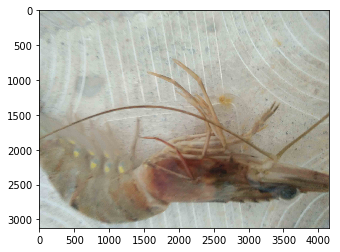

In [0]:
import matplotlib.pyplot as plt

plt.imshow(im)
plt.show()

In [0]:
img = cv2.imread('dead1.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

In [0]:
classes = model.predict(img)

print(classes[0][0])

0.01136157


In [0]:
from google.colab import files
uploaded = files.upload()

Saving living1.jpg to living1.jpg


In [0]:
im2 = Image.open(BytesIO(uploaded['living1.jpg']))

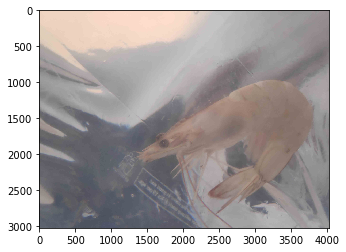

In [0]:
import matplotlib.pyplot as plt

plt.imshow(im2)
plt.show()

In [0]:
img = cv2.imread('living1.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

In [0]:
classes = model.predict(img)

print(classes[0][0])

0.9998677


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('prawns.h5')
model_file = drive.CreateFile({'title' : 'prawns.h5'}) 
model_file.SetContentFile('prawns.h5')                       
model_file.Upload()

In [0]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1buy1onplcHUPVk1vA1qQ0QByQs1xgdV2'})

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials